In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:xlabel='target', ylabel='count'>

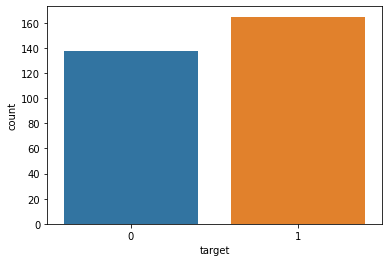

In [8]:
sns.countplot(x="target", data=df) #hastalıklı ve sağlam sayıları

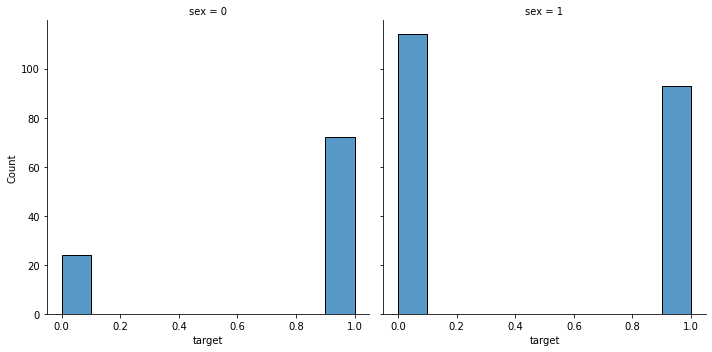

In [9]:
sns.displot(df, x="target", col="sex", multiple="dodge") #cinsiyetlere göre hastalıklı ve sağlam sayıları

<AxesSubplot:xlabel='age', ylabel='count'>

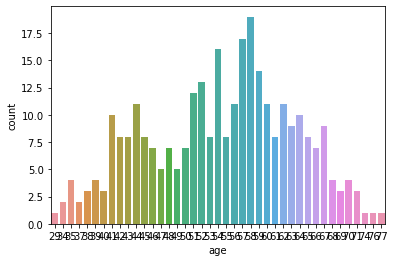

In [10]:
#sns.histplot(df['age'])
sns.countplot(x="age", data=df) #yaş dağılımlarını gösteren sutun grafiği

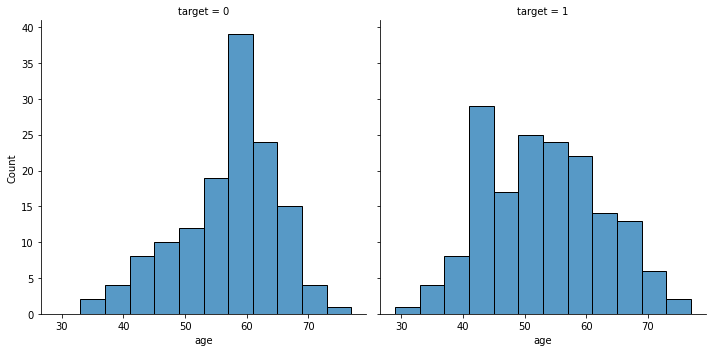

In [11]:
sns.displot(df, x="age", col="target", multiple="dodge") #hasta olanların yaş dağılımı aşağıdaki ikinci sutun grafiği

In [12]:
zero_not_accepted = ['oldpeak', 'cp', 'slope', 'thal', 'age', 'trestbps', 'chol', 'thalach']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145,233,1,0,150,0,2.3,1.0,0,1.0,1
1,37,1,2.0,130,250,0,1,187,0,3.5,1.0,0,2.0,1
2,41,0,1.0,130,204,0,0,172,0,1.4,2.0,0,2.0,1
3,56,1,1.0,120,236,0,1,178,0,0.8,2.0,0,2.0,1
4,57,0,1.0,120,354,0,1,163,1,0.6,2.0,0,2.0,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,1.0,140,241,0,1,123,1,0.2,1.0,0,3.0,0
299,45,1,3.0,110,264,0,1,132,0,1.2,1.0,0,3.0,0
300,68,1,1.0,144,193,1,1,141,0,3.4,1.0,2,3.0,0
301,57,1,1.0,130,131,0,1,115,1,1.2,1.0,1,3.0,0
302,57,0,1.0,130,236,0,0,174,0,1.0,1.0,1,2.0,0


In [15]:
"""X=df.drop('target',axis=1)
y = df['target']"""

X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
#random_state = 2 yapınca mükemmel sonuçlar verdi

In [17]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
#print(X_test)

In [18]:
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [19]:
prediction = nvclassifier.predict(X_test)

In [20]:
print(prediction) #eğitim için kullandığımız veriden yaptığı tahmin
print(y_test.values) #gerçek sonuçlar

"""y_compare = np.vstack((y_test, prediction)).T
print(y_compare)"""

[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0]
[1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1]


'y_compare = np.vstack((y_test, prediction)).T\nprint(y_compare)'

In [21]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[27  5]
 [ 1 28]]


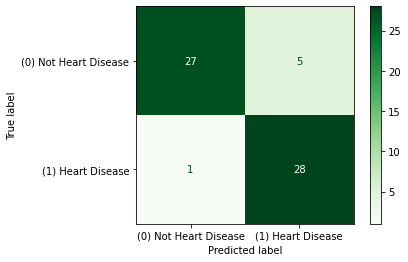

In [22]:
plot_confusion_matrix(nvclassifier, X_test, y_test, display_labels = ["(0) Not Heart Disease", "(1) Heart Disease"], cmap = plt.cm.Greens)

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [24]:
cm = confusion_matrix(y_test, prediction)
accuracy = (cm[0][0] + cm[1][1]) / X_test.shape[0]
sensitivity = cm[0][0] / (cm[0][0] + cm[1][0])
specificy = cm[1][1] / (cm[1][1] + cm[0][1])
print("Accuracy: ", accuracy)
print("Sensitivity: ", sensitivity)
print("Specificy: ", specificy)

Accuracy:  0.9016393442622951
Sensitivity:  0.9642857142857143
Specificy:  0.8484848484848485


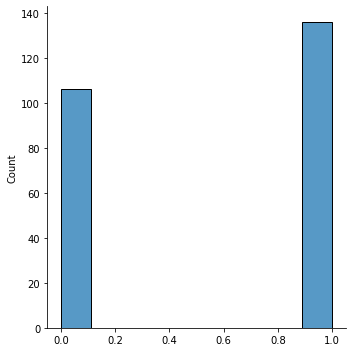

In [25]:
sns.displot(y_train.values)

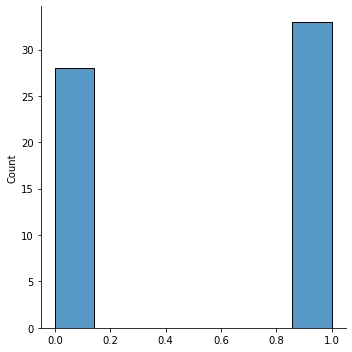

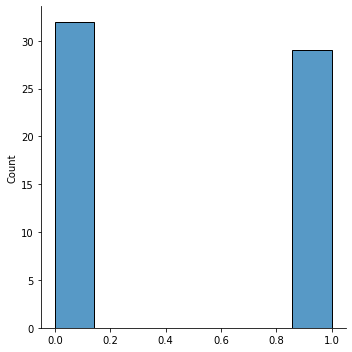

In [26]:
sns.displot(prediction)
sns.displot(y_test.values)